In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import nltk

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
sid = SentimentIntensityAnalyzer()

In [6]:
keralaStory = pd.read_csv('D:/Dissertation/Final_Predictions.csv',index_col = 0)

In [7]:
keralaStory.head(5)

,Date,Tweet,Predicted Label
0,25/04/2023 19:24,#TheKerlaStory,Manipulator
1,26/04/2023 19:19,Just watched the trailer of #thekerlastory 😬\n...,Supporter
2,26/04/2023 19:14,@Starboy2079 #mustwatcgthekerlastory #Thekerla...,Manipulator
3,26/04/2023 19:11,#Thekerlastory 👍🏻👍🏻🩷🩷,Supporter
4,26/04/2023 18:19,#TheKerlaStory @ARanganathan72\nhttps://t.co/5...,Neutral


In [9]:
keralaStory.head(5)

,Date,Tweet,Predicted Label
0,25/04/2023 19:24,#TheKerlaStory,Manipulator
1,26/04/2023 19:19,Just watched the trailer of #thekerlastory 😬\n...,Supporter
2,26/04/2023 19:14,@Starboy2079 #mustwatcgthekerlastory #Thekerla...,Manipulator
3,26/04/2023 19:11,#Thekerlastory 👍🏻👍🏻🩷🩷,Supporter
4,26/04/2023 18:19,#TheKerlaStory @ARanganathan72\nhttps://t.co/5...,Neutral


In [8]:
keralaStory['scores'] = keralaStory['Tweet'].apply(lambda Tweet: sid.polarity_scores(Tweet))

In [11]:
keralaStory.head(5)

,Date,Tweet,Predicted Label,scores
0,25/04/2023 19:24,#TheKerlaStory,Manipulator,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,26/04/2023 19:19,Just watched the trailer of #thekerlastory 😬\n...,Supporter,"{'neg': 0.059, 'neu': 0.789, 'pos': 0.151, 'co..."
2,26/04/2023 19:14,@Starboy2079 #mustwatcgthekerlastory #Thekerla...,Manipulator,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,26/04/2023 19:11,#Thekerlastory 👍🏻👍🏻🩷🩷,Supporter,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,26/04/2023 18:19,#TheKerlaStory @ARanganathan72\nhttps://t.co/5...,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [9]:
keralaStory['compound'] = keralaStory['scores'].apply(lambda score_dict:score_dict['compound'])

In [33]:
negative_tweets = keralaStory[keralaStory['compound'] < -0.5]


In [10]:
def classify_sentiment(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'



In [11]:
keralaStory['Sentiment'] = keralaStory['compound'].apply(classify_sentiment)


In [12]:
keralaStory['Date'] = pd.to_datetime(keralaStory['Date']).dt.date

C:\Users\mathe\AppData\Local\Temp\ipykernel_12216\521945426.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  kerala_story_trimmed['Date'] = pd.to_datetime(kerala_story_trimmed['Date']).dt.date


In [14]:
sentiment_counts = keralaStory.groupby([keralaStory['Date'], 'Sentiment']).size().unstack(fill_value=0)


In [56]:
stance_counts = sentiments.groupby(['Sentiment', 'Predicted Label']).size().reset_index(name='count')

In [16]:
print(stance_counts)

   Sentiment Predicted Label  count
0   Negative         Against    233
1   Negative     Manipulator    105
2   Negative         Neutral    281
3   Negative       Supporter   2930
4    Neutral         Against     46
5    Neutral     Manipulator   1541
6    Neutral         Neutral    320
7    Neutral       Supporter   2556
8   Positive         Against     32
9   Positive     Manipulator    154
10  Positive         Neutral    209
11  Positive       Supporter   3865


In [5]:
LanguageUsed = keralaStory.groupby('LanguageUsed').size().sort_values(ascending=False)

In [7]:
LanguageUsed.shape

(56,)

In [8]:
print(LanguageUsed)

LanguageUsed
hi     5453
en     5342
mr      459
bn      372
gu      138
ta      109
te       85
ml       61
kn       51
sa       30
om       29
ar       22
or       17
ur       12
id        7
ru        6
nso       5
af        5
ro        5
ny        4
so        4
pa        4
zu        4
jv        4
fil       4
und       3
no        2
de        2
fy        2
sn        2
th        2
ceb       2
uz        2
cy        1
da        1
sl        1
sw        1
sv        1
st        1
sq        1
ln        1
eu        1
el        1
rw        1
mg        1
fi        1
qu        1
pl        1
fr        1
ko        1
nl        1
kri       1
ku        1
lg        1
mi        1
ne        1
dtype: int64


In [21]:
#Visualisations
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [46]:
top_values = LanguageUsed.sort_values(ascending=False).head(5)

In [47]:
print(top_values)

LanguageUsed
other    11873
hi        5453
en        5342
mr         459
bn         372
dtype: int64


In [13]:
sum_of_values = LanguageUsed.sum()


In [14]:
other = sum_of_values - 5453-5342-459-372

In [11]:
top_languages = LanguageUsed.head(4)

In [15]:
top_languages['other'] = other


In [16]:
top_languages

LanguageUsed
hi       5453
en       5342
mr        459
bn        372
other     646
dtype: int64

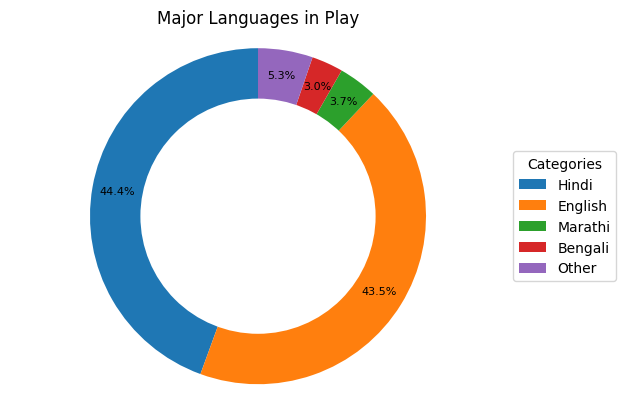

In [17]:
# create data
sizes= top_languages.values
labels = ['Hindi','English','Marathi','Bengali','Other']

explode = (0.1, 0, 0, 0, 0, 0, 0)
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=90, pctdistance=0.85,labeldistance=1.1, wedgeprops=dict(width=0.4))

ax.axis('equal')  

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8)

plt.title("Major Languages in Play")
plt.show()

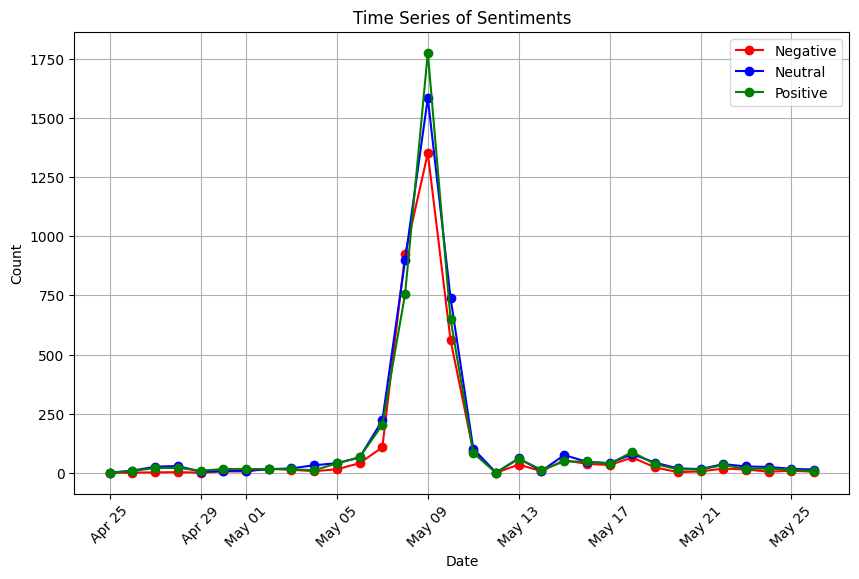

In [35]:
plt.figure(figsize=(10, 6))

for sentiment in sentiment_counts.columns:
    if sentiment == 'Negative':
        color = 'red'
    elif sentiment == 'Neutral':
        color = 'blue'
    else:
        color = 'green'    
    plt.plot(sentiment_counts.index, sentiment_counts[sentiment], marker='o', label=sentiment, color=color)

date_format = mdates.DateFormatter('%b %d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series of Sentiments')
plt.legend()
plt.grid()
plt.show()

In [63]:
pivot_counts = stance_counts.pivot(index='Predicted Label', columns='Sentiment', values='count')


In [62]:
print(pivot_counts)

Sentiment        Negative  Neutral  Positive
Predicted Label                             
Against               233       46        32
Manipulator           105     1541       154
Neutral               281      320       209
Supporter            2930     2556      3865


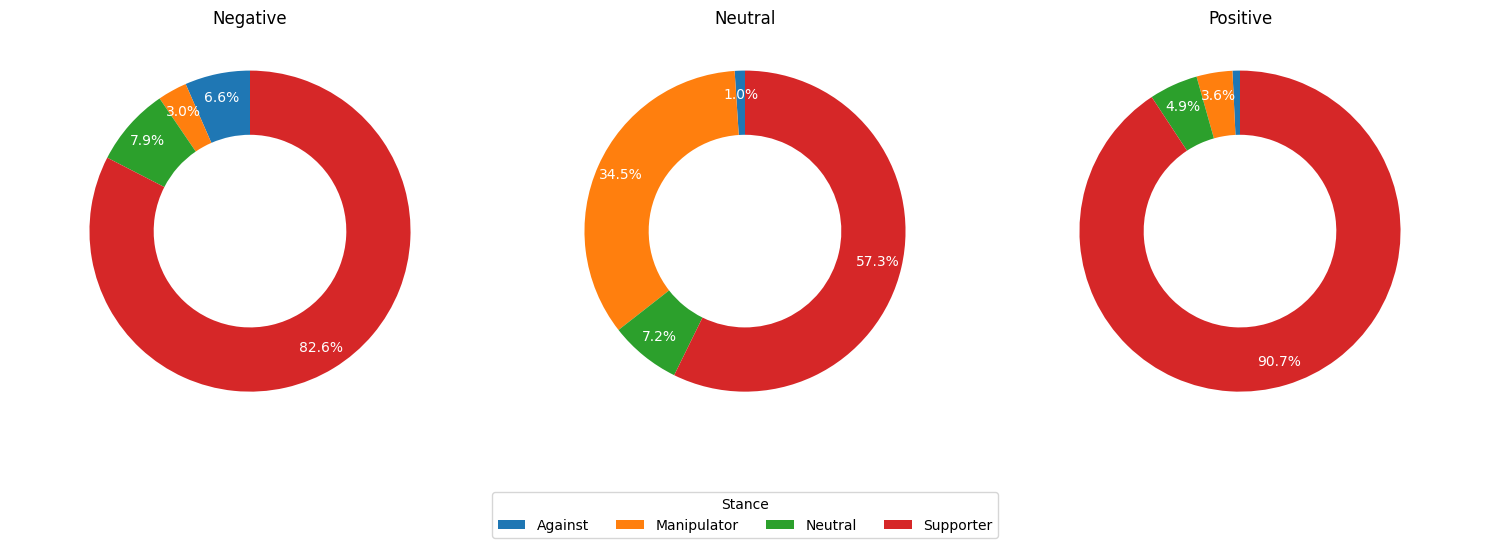

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# List to store legend handles and labels
legend_handles = []
legend_labels = pivot_counts.index.tolist()  # Stance labels

# Iterate through sentiments and create donut charts
for i, sentiment in enumerate(pivot_counts.columns):
    ax = axes[i]
    data = pivot_counts[sentiment].dropna()
    def my_autopct(pct):
        return f'{pct:.1f}%' if pct >= 1 else ''
    wedges, texts, autotexts = ax.pie(data, labels=None, autopct=my_autopct,
                                      startangle=90, pctdistance=0.85,
                                      wedgeprops=dict(width=0.4))
    
    # Append the handles to the legend_handles list
    legend_handles.extend(wedges)
    
    for autotext in autotexts:
        autotext.set_color('white')
    ax.set_title(sentiment.capitalize())
    ax.axis('equal')

# Create a single legend box at the bottom
legend = fig.legend(legend_handles, legend_labels, title="Stance",
                    loc="lower center", bbox_to_anchor=(0.5, -0.1),
                    ncol=len(legend_labels))

# Adjust the layout to accommodate the legend
plt.tight_layout(rect=(0, 0.1, 1, 1))

plt.show()